In [22]:
import numpy as np
import pandas as pd
import sqlite3

import matplotlib as plt

import seaborn as sns

import regex as re

import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier


[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\dakot\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\dakot\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\omw-1.4.zip.


In [23]:
df_raw = pd.read_csv('database/IMDB Dataset.csv')
df_raw.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


C:\Users\dakot\anaconda3\envs\youtube_nlp\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sentiment', ylabel='count'>

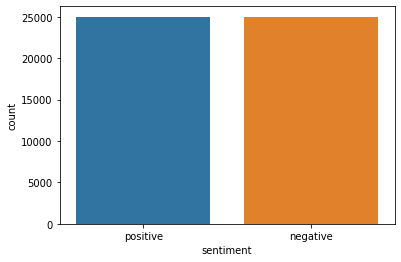

In [24]:
sns.countplot(df_raw.sentiment)

In [25]:
lemmatizer=WordNetLemmatizer()

def documentProcessor(df_column):
    corpus=[]

    for document in df_column:
        documentProcessed=re.sub('[^a-zA-Z]', ' ', str(document))
        documentProcessed=documentProcessed.lower()
        documentProcessed=documentProcessed.split()
        documentProcessed=[word for word in documentProcessed if word not in set(stopwords.words('english'))]
        documentProcessed=[lemmatizer.lemmatize(word) for word in documentProcessed]
        corpus.append(' '.join(str(word) for word in documentProcessed))
    return corpus



In [27]:
corpus=documentProcessor(df_raw['review'])

KeyboardInterrupt: 

In [ ]:
#construct a wordcloud to visualize the distribution of descriptor words in the "description" feature. This is used create new
#features in the data cleaning script

from wordcloud import WordCloud, ImageColorGenerator, STOPWORDS

import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

#add words from the home description feature to the list of words to be used in the cloud
words=" ".join(corpus)

#define stop/break words for word cloud function
def punctuation_stop(text):
    filtered=[]
    stop_words=set(stopwords.words("english"))
    word_tokens=word_tokenize(text)
    for w in word_tokens:
        if w not in stop_words and w.isalpha():
            filtered.append(w.lower())
    return filtered
words_filtered=punctuation_stop(words)

#Define words that should not be included in the word cloud
unwanted=[]

text=" ".join([ele for ele in words_filtered if ele not in unwanted])

#call word cloud function and generate plot
wc=WordCloud(background_color="white", stopwords=STOPWORDS, max_words=2000, width=800,height=1500)
wc.generate(text)

plt.figure(figsize=[10,10])
plt.imshow(wc, interpolation="bilinear")
plt.axis('off')
plt.show()

In [ ]:
ctVectorizer=CountVectorizer(ngram_range=(1,2))
vectorizedData=ctVectorizer.fit_transform(corpus)



In [ ]:
#Random Forest Model

parameters= {
    'max_features': ('auto','sqrt'),
    'n_estimators':[500, 1000, 1500],
    'max_depth':[5,10,None],
    'min_samples_split':[5,10,15],
    'min_samples_leaf':[1,2,5,10],
    'bootstrap':[True, False]
}

grid_search=GridSearchCV(RandomForestClassifier(), parameters, cv=5, return_train_score=True, n_jobs=-1)
grid_search.fit(X,y)
grid_search.best_params
